In [1]:
import pandas as pd

data = pd.read_csv('probability_matrix.csv')

data.head()


,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Q30
0,4.098044e-09,9.446476e-07,2.902420e-15,4.432403e-16,3.294941e-15,1.853705e-14,7.260848e-15,4.260201e-15,8.452581e-15,1.775263e-15,...,4.574823e-16,6.642302e+01,4.306083e-15,2.856543e-15,1.999806e-30,4.260201e-15,3.918144e-22,2.091106e-07,8.989060e-16,2.114047e-14
1,1.054714e-28,8.808165e-21,5.862951e-21,2.196646e-28,1.077912e-19,1.114585e-14,2.001274e-20,3.809701e-20,1.403695e-27,3.198242e-28,...,1.320542e-46,2.658420e-12,2.755048e-29,6.677862e-37,4.397757e-37,1.955609e-22,1.846757e-11,8.351947e-07,5.167566e-28,1.489721e-22
2,4.774094e+00,2.895635e+00,2.895635e+00,4.774094e+00,7.871151e+00,2.895635e+00,4.774094e+00,7.871151e+00,1.756291e+00,1.756291e+00,...,7.871151e+00,2.895635e+00,2.895635e+00,2.895635e+00,2.895635e+00,2.895635e+00,2.895635e+00,2.895635e+00,1.065244e+00,2.895635e+00
3,1.691274e-24,6.579706e-23,7.992828e-32,1.481517e-22,3.535274e-23,4.802951e-45,7.134378e-09,2.058859e-37,8.356808e-07,4.802951e-45,...,1.775386e-30,1.762839e-29,2.812372e-21,1.092078e-16,6.970354e-22,1.017668e-19,1.686165e-15,3.888851e-38,5.173421e-13,1.396211e-28
4,4.905370e-61,1.692663e-42,1.343972e-26,2.304852e-36,6.428694e-45,2.273306e-44,1.005808e-52,1.459681e-44,2.473954e-37,1.754390e-35,...,1.723173e-27,3.756380e-27,2.450414e-29,7.199524e-22,9.300981e-61,4.668098e-36,1.700625e-27,1.887086e-35,2.536725e-44,1.000000e+02


In [5]:
from umap import UMAP
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

umap_model = UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
reduced_data = umap_model.fit_transform(data)

/Users/yangyanhua/opt/anaconda3/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [8]:
reduced_data.shape

(2669, 2)

In [9]:
reduced_data

array([[ -1.034306  ,  -0.32631233],
       [ -9.935308  ,  -7.1729674 ],
       [ -0.2586261 ,   1.2252561 ],
       ...,
       [ 11.941817  ,  -9.860804  ],
       [  3.4772174 , -14.120584  ],
       [  1.1305943 ,  -1.1147017 ]], dtype=float32)

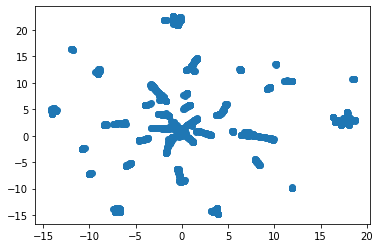

In [11]:
import matplotlib.pyplot as plt
plt.scatter(reduced_data[:,0], reduced_data[:, 1])
plt.show()

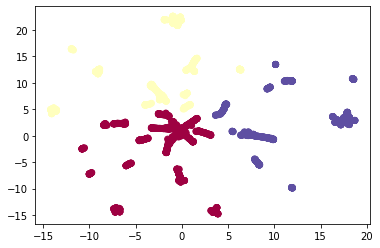

In [22]:
from sklearn.cluster import KMeans
import numpy as np
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10).fit(reduced_data)
labels = kmeans.labels_
plt.scatter(reduced_data[:,0], reduced_data[:, 1], c=labels, cmap="Spectral")
plt.show()

In [23]:
kmeans.inertia_

137751.71875

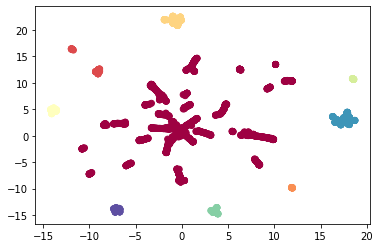

In [33]:
from sklearn.cluster import DBSCAN
import numpy as np
clustering = DBSCAN(eps=5, min_samples=2).fit(reduced_data)
labels = clustering.labels_
kmeans.inertia_
plt.scatter(reduced_data[:,0], reduced_data[:, 1], c=labels, cmap="Spectral")
plt.show()

In [34]:
labels_set = set(labels)
clusters = [[] for _ in range(len(labels_set))]
for ind, row in enumerate(reduced_data):
    cluster_ind = labels[ind]
    clusters[cluster_ind].append(row)
centers = [np.array(cluster).mean() for cluster in clusters]
all_distance = []
for center1 in centers:
    for center2 in centers:
        distance = np.abs(center2 - center1)
        all_distance.append(distance)
mean_distance = sum(all_distance) / len(all_distance)
mean_distance

8.815137298018843